In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as statistics

<b>LOADING DATA<b/>

In [3]:
census_data = pd.read_csv(r"C:\Users\kibe\Downloads\Carlifonia_census_data.csv")

<b>EXPLORING DATA<b/>

In [4]:
census_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [12]:
census_data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms            object
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [15]:
census_data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age total_rooms  total_bedrooms  \
0        -122.23     37.88                  41         880           129.0   
1        -122.22     37.86                  21        7099          1106.0   
2        -122.24     37.85                  52        1467           190.0   
3        -122.25     37.85                  52        1274           235.0   
4        -122.25     37.85                  52        1627           280.0   
...          ...       ...                 ...         ...             ...   
20635    -121.09     39.48                  25        1665           374.0   
20636    -121.21     39.49                  18         697           150.0   
20637    -121.22     39.43                  17        2254           485.0   
20638    -121.32     39.43                  18        1860           409.0   
20639    -121.24     39.37                  16        2785           616.0   

       population  households  

In [25]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


<b>total rooms(edited later on) and total bedrooms have null values<b/>
    

In [9]:
census_data.loc[census_data["total_rooms"] =="??"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10,-122.26,37.85,52,??,434.0,910,402,3.2031,281500,NEAR BAY
29,-122.28,37.84,52,??,160.0,395,155,1.6875,132000,NEAR BAY
42,-122.26,37.84,49,??,202.0,462,189,1.0250,118800,NEAR BAY
58,-122.28,37.82,52,??,341.0,1074,304,1.2171,80300,NEAR BAY
72,-122.29,37.81,49,??,204.0,560,152,1.7500,75000,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20552,-121.80,38.68,11,??,892.0,1847,747,3.4331,120600,INLAND
20561,-121.77,38.67,42,??,518.0,1548,534,2.2794,108900,INLAND
20572,-121.98,38.52,27,??,565.0,1583,514,2.7989,126700,INLAND
20606,-121.57,39.12,30,??,534.0,1702,506,2.0800,56600,INLAND


<b>To replace null values in Total rooms column with the median value<b/> 

In [6]:
census_data['total_rooms'] = census_data['total_rooms'].replace('??',np.nan) 

#calculating the median value of the total_rooms column
med_total_rooms = census_data['total_rooms'].median()

census_data['total_rooms'] = census_data['total_rooms'].fillna(med_total_rooms)


In [9]:
#To convert total_rooms column to int data type
census_data = census_data.astype({'total_rooms' :np.int64})

In [10]:
census_data["total_rooms"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: total_rooms
Non-Null Count  Dtype
--------------  -----
20640 non-null  int64
dtypes: int64(1)
memory usage: 161.4 KB


<b>To replace null values in Total bedrooms column with the median value<b/>

In [12]:
#calculating median value of the total_bedrooms column
med_total_bedrooms = census_data['total_bedrooms'].median()
census_data['total_bedrooms'] =census_data['total_bedrooms'].fillna(med_total_bedrooms)


In [13]:
census_data["total_bedrooms"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [32]:
census_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<b>DATA VISUALISATION</b>

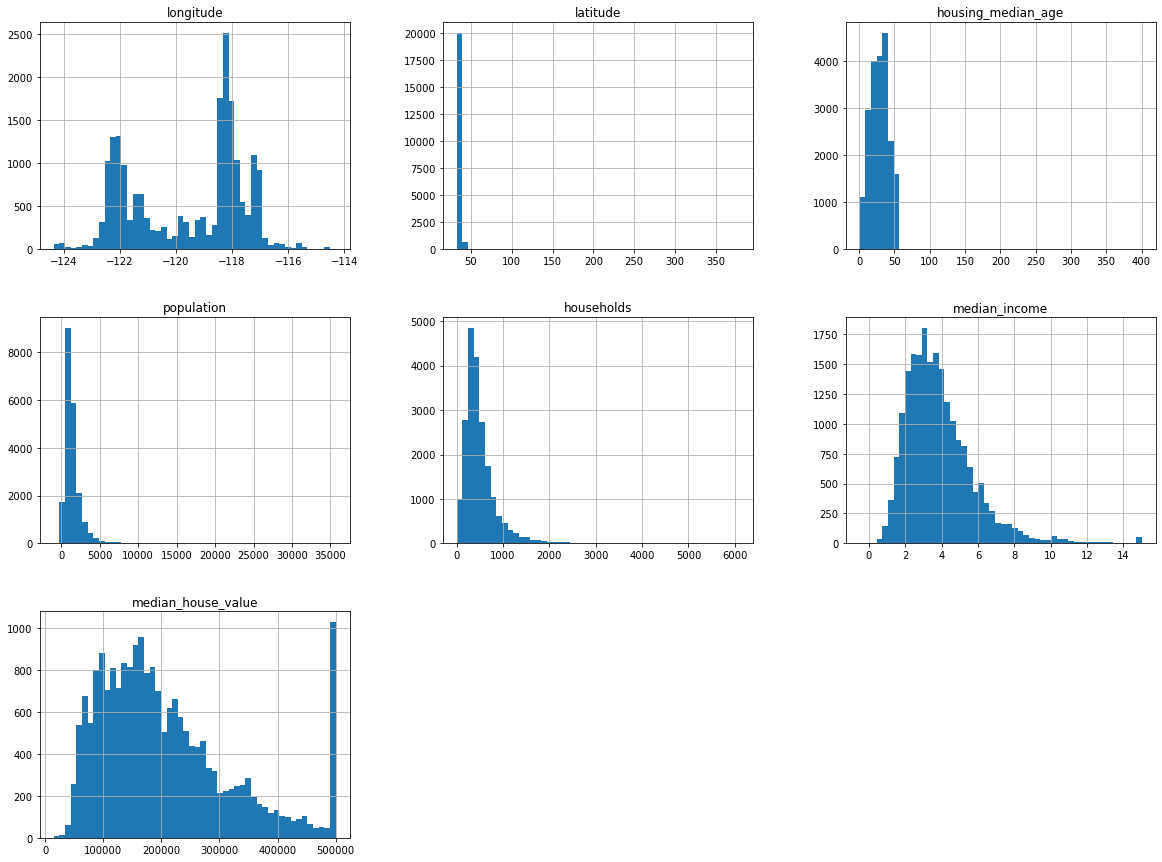

In [35]:
census_data.hist(bins = 50, figsize = (20,15))
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

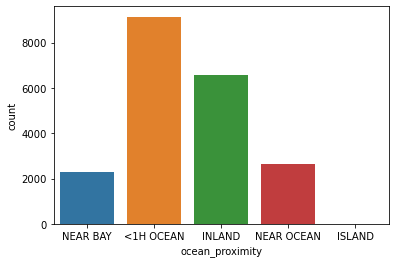

In [14]:
sns.countplot(x= 'ocean_proximity', data = census_data)

From the data above most people live less than an hour from the ocean

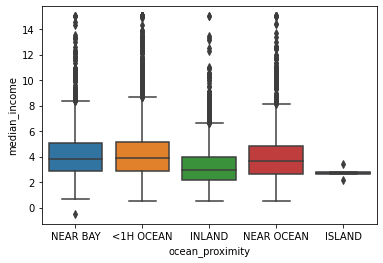

In [15]:
sns.boxplot(data = census_data , x = census_data['ocean_proximity'], y = census_data['median_income'])
plt.show()

From the data above high income households live less than an hour away from the ocean and near the bay respectively